In [3]:
# Import potrzebnych pakietów

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Wyświetlenie wszystkich początkowych danych po odczytaniu pliku

initialData = pd.read_csv('fortune500-full.csv')
initialData

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


In [5]:
# Zmiana nazw kolumn w celu ułatwienia manipulacji danymi

data = pd.read_csv('fortune500-full.csv', names = ['Year', 'Rank', 'Company', 'Revenue', 'Profit'], header = 0)
data

,Year,Rank,Company,Revenue,Profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


In [6]:
# Usunięcie kilku kolumn w celu ułatwienia transformacji dataframe'u

dataDroppedCols = data.drop(columns=['Rank', 'Profit'])
dataDroppedCols

,Year,Company,Revenue
0,1955,General Motors,9823.5
1,1955,Exxon Mobil,5661.4
2,1955,U.S. Steel,3250.4
3,1955,General Electric,2959.1
4,1955,Esmark,2510.8
...,...,...,...
25495,2005,Wm. Wrigley Jr.,3648.6
25496,2005,Peabody Energy,3631.6
25497,2005,Wendy's International,3630.4
25498,2005,Kindred Healthcare,3616.6


In [7]:
# Zapytania w celu wyboru 3 firm, które zostaną przedstawione na wykresie

generalMotorsInitial = dataDroppedCols.query('Company == "General Motors"')
exxonMobilInitial = dataDroppedCols.query('Company == "Exxon Mobil"')
boeingInitial = dataDroppedCols.query('Company == "Boeing"')

In [8]:
# Scalenie danych 3 wybranych firm do jednej tabeli + transpozycja Firm jako headerów tabeli

mergedTable = pd.concat([generalMotorsInitial, exxonMobilInitial, boeingInitial], axis=0, ignore_index=True)
table = mergedTable.groupby([mergedTable.Year, 'Company'])['Revenue'].first().unstack()
table

Company,Boeing,Exxon Mobil,General Motors
Year,,,
1955,1033.2,5661.4,9823.5
1956,853.8,6272.4,12443.3
1957,1006.4,7126.9,10796.4
1958,1596.5,7830.2,10989.8
1959,1711.9,7543.6,9522.0
1960,1612.2,7910.7,11233.1
1961,1554.6,8034.7,12736.0
1962,1800.9,8437.7,11395.9
1963,1768.5,9536.9,14640.2


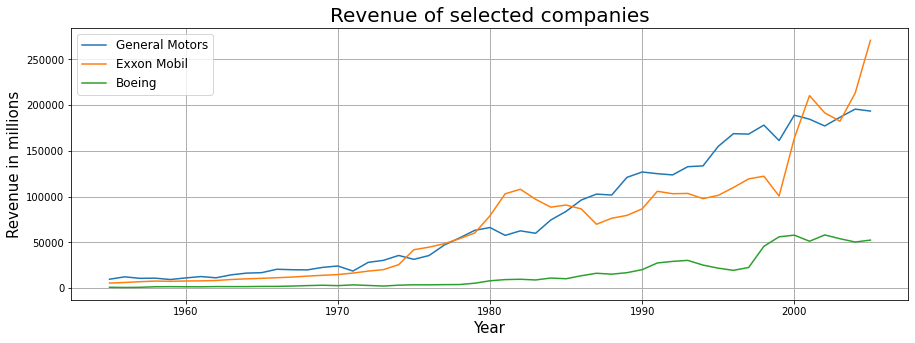

In [10]:
# Wykres Revenue wybranych firm

plt.figure(figsize = (15, 5))
plt.title("Revenue of selected companies", fontsize = 20)
plt.ylabel("Revenue in millions", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.plot(table.index, table['General Motors'], label='General Motors')
plt.plot(table.index, table['Exxon Mobil'], label='Exxon Mobil')
plt.plot(table.index, table['Boeing'], label='Boeing')
plt.grid(linewidth = 1)
plt.legend(prop={'size': 12})
plt.show()